In [8]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
plt.rc('font', family='D2Coding')
from plotnine import *

In [9]:
house = pd.read_csv('./data/서울특별시_전월세가_2022.csv')
house.head()

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,...,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,...,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,...,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
4,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,13000,0,NaN,2019.0,단독다가구,22.01~24.01,신규,NaN,0.0,NaN


In [10]:
house.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분코드', '지번구분', '본번', '부번',
       '층', '계약일', '전월세구분', '임대면적', '보증금(만원)', '임대료(만원)', '건물명', '건축년도',
       '건물용도', '계약기간', '신규계약구분', '갱신청구권사용', '종전보증금', '종전임대료'],
      dtype='object')

In [5]:
house.drop(['지번구분코드', '지번구분', '본번', '부번','층', '건축년도', '건물용도', '계약기간', '신규계약구분',
       '갱신청구권사용', '종전보증금', '종전임대료'] ,axis=1, inplace=True)
house.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '계약일', '전월세구분', '임대면적',
       '보증금(만원)', '임대료(만원)', '건물명'],
      dtype='object')

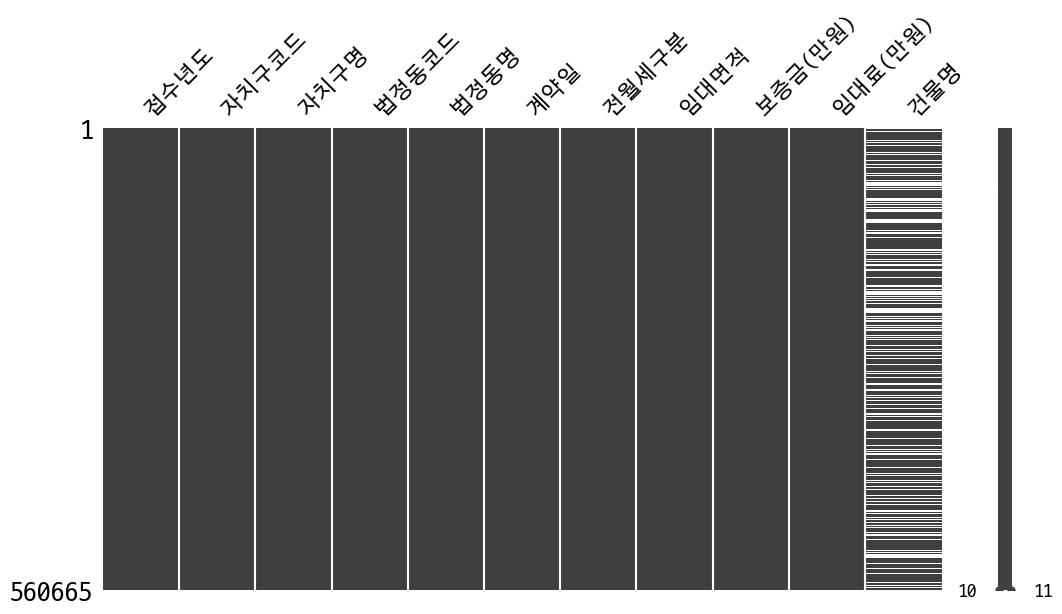

In [6]:
msno.matrix(house , figsize=(12, 6))
plt.show()

In [7]:
value_columns = ['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '계약일', '전월세구분', '임대면적',
       '보증금(만원)', '임대료(만원)', '건물명']
house_col = house[value_columns]
house_col

,접수년도,자치구코드,자치구명,법정동코드,법정동명,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명
0,2022,11560,영등포구,12600,양평동2가,20220101,전세,18.84,16000,0,힘멜하임
1,2022,11560,영등포구,11800,도림동,20220101,월세,20.00,300,30,NaN
2,2022,11215,광진구,10700,화양동,20220101,월세,27.82,10000,135,NaN
3,2022,11620,관악구,10100,봉천동,20220101,월세,18.50,4000,40,NaN
4,2022,11620,관악구,10100,봉천동,20220101,전세,14.00,13000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
560660,2022,11230,동대문구,10200,용두동,20221231,월세,43.00,17000,25,NaN
560661,2023,11560,영등포구,13200,신길동,20221231,월세,37.00,1000,33,NaN
560662,2023,11530,구로구,10700,개봉동,20221231,전세,37.00,8500,0,NaN
560663,2023,11290,성북구,13300,정릉동,20221231,월세,63.57,5000,60,NaN


In [8]:
del house

In [9]:
house_col.isnull().sum()

접수년도            0
자치구코드           0
자치구명            0
법정동코드           0
법정동명            0
계약일             0
전월세구분           0
임대면적            0
보증금(만원)         0
임대료(만원)         0
건물명        157760
dtype: int64

In [10]:
from geopy.geocoders import Nominatim

# Geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="geoapiExercises")

# 주소를 이용하여 위도와 경도를 얻는 함수를 만듭니다.
def get_latitude_longitude(df):
    latitudes = []
    longitudes = []
    
    for address in df['법정동명']:
        location = geolocator.geocode(address)
        
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    
    df['위도'] = latitudes
    df['경도'] = longitudes
    
    return df

# 'house_col' 데이터프레임을 함수에 전달하여 주소를 이용한 위도와 경도를 얻습니다.
house_col_with_coordinates = get_latitude_longitude(house_col)

# 결과를 확인합니다.
print(house_col_with_coordinates.head())


GeocoderInsufficientPrivileges: Non-successful status code 403

In [11]:
# house_col 데이터프레임을 가정합니다. 필요에 따라 데이터를 로드하십시오.
# house_col = pd.read_csv('your_data.csv')

# '자치구명'과 '법정동명'을 기준으로 '보증금(만원)'의 평균을 구합니다.
average_deposit = house_col.groupby(['자치구명', '법정동명'])['보증금(만원)'].mean().reset_index()

# 결과를 확인합니다.
print(average_deposit)

    자치구명 법정동명       보증금(만원)
0    강남구  개포동  45288.589778
1    강남구  논현동  21317.245226
2    강남구  대치동  55674.782917
3    강남구  도곡동  74925.482772
4    강남구  삼성동  43803.244600
..   ...  ...           ...
396  중랑구  면목동  15211.236316
397  중랑구   묵동  15626.472921
398  중랑구  상봉동  16803.579504
399  중랑구  신내동  16935.093166
400  중랑구  중화동  13082.786927

[401 rows x 3 columns]


In [13]:
# house_col 데이터프레임을 가정합니다. 필요에 따라 데이터를 로드하십시오.
# house_col = pd.read_csv('your_data.csv')

# '법정동명'에서 중복값을 제거합니다.
unique_dong_names = house_col['법정동명'].drop_duplicates()

# 유일한 '법정동명'을 출력합니다.
print(unique_dong_names)
print(len(unique_dong_names))

0         양평동2가
1           도림동
2           화양동
3           봉천동
6           신당동
          ...  
294924      돈의동
336273      사간동
403276       재동
451726      주교동
499840     종로5가
Name: 법정동명, Length: 399, dtype: object
399


In [14]:
# house_col 데이터프레임을 가정합니다. 필요에 따라 데이터를 로드하십시오.
# house_col = pd.read_csv('your_data.csv')

# '법정동명' 열에서 중복값을 제거합니다.
unique_dong_names = house_col['법정동명'].drop_duplicates()

# Geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="geoapiExercises")

# 각 '법정동명'에 대한 주소를 생성하고 지오코딩을 수행합니다.
locations = []
for dong_name in unique_dong_names:
    address = f"{dong_name}, 대한민국"
    location = geolocator.geocode(address)
    if location:
        locations.append(location)

# 결과를 확인합니다.
for location in locations:
    print(f"주소: {location.address}")
    print(f"위도: {location.latitude}")
    print(f"경도: {location.longitude}")
    print()

GeocoderInsufficientPrivileges: Non-successful status code 403

In [ ]:
# 주소를 인수로 넘겨받아 위도, 경도를 리턴하는 함수
def geocoding(address):
    geolocoder = Nominatim(user_agent='South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    return {'위도': geo.latitude, '경도': geo.longitude}
    
address = geocoding('경기도 고양시 장항동')
print(address)

# 데이터프레임에서 서울 데이터만 추출한다.

In [ ]:
# 서울만 시각화해보면 서울 지도하고 비슷하게 나온다. 
(
    ggplot(house_col, aes(x='경도', y='위도'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

# 데이터프레임의 도로명주소 열을 활용해서 '시도', '구군', '도로명' 열을 만든다.

In [ ]:
# split() 메소드에 expend=True 옵션을 지정해서 공백을 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도''구군''도로명 열을 만든다.
print(type(house_col[:1].도로명주소.str)) #Series에는 split속성이 없다. - 스트링으로 형변환
print(type(house_col[:1].도로명주소.str.split(' '))) # 다시 시리즈로 변환
print('-' * 80)
print(type(house_col[:1].도로명주소.str.split(' ' , expand=True))) # 데이터프레임으로 속성 변환
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[0]) # 데이터프레임의 열 이름을 추가
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[1])
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[2])

In [ ]:
house_col['시도'] = house_col.도로명주소.str.split(' ' , expand=True)[0]
house_col['구군'] = house_col.도로명주소.str.split(' ' , expand=True)[1]
house_col['도로명'] = house_col.도로명주소.str.split(' ' , expand=True)[2]
house_col

In [ ]:
(
    ggplot(house_col, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='구군')
plt.show()

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='상권업종대분류명')
plt.show()

In [ ]:
house_col = house_col[house_col.상권업종대분류명 == '교육']
house_col

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='상권업종중분류명', s=15)
plt.show()

# 입시 학원

In [ ]:
house_col_edu = house_col[house_col.상권업종소분류명 == '입시·교과학원']
house_col_edu

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col_edu, x = '경도', y = '위도', hue='구군', s=15)
plt.show()